# Εργασία Αναγνώρισης προτύπων
## Πρώτο Παραδοτέο

#### Τσιμπλιαρίδης Νικόλαος ΑΕΜ:9652
#### Τζελίλαϊ Τζούλιο ΑΕΜ: 9662

Κάνουμε import τις βιβλιοθήκες numpy και matplotlib

In [1]:
import numpy as np

import matplotlib.pyplot as plt

## Μέρος Α'
### Ερώτημα 1ο
Ορίζουμε το διάνυσμα μέσων όρων για την κατανομή του x δεδομένου ότι ο εξεταζόμενος είναι υγιής P(x|ω1).

Ορίζουμε και τον πίνακα ετεροσυσχετίσεων ενώ στην συνέχεια αποθηκεύουμε σε έναν πίνακα 2 διαστάσεων τυχαίες τίμη με βάση τις παραπάνω μέσες τιμές και διασπορές, οι οποίες όμως έχουν στρογγυλοποιηθεί ανά 0.1 για να είναι διακριτές (πχ 0.1,0.2,0.3 κτλ)

*Έχουμε πάρει 100000 διανύσματα τ.μ.

In [2]:
#Το 0.4 η μέση τιμή για Χ1 ενώ το 0.8 για Χ2 δεδομένου του ω1
mu1 = [0.4, 0.8]

#Πίνακας ετεροσυσχετίσεων
cov = [[1.5, 0], [0, 0.8]]


#Πόσα δείγματα θέλουμε
numOfSamples = 1000000

# Αποθηκεύουμε στον (1000000x2) πίνακα samples1 τυχαίες τίμες από μια κανονική κατανομή πολλών μεταβλητών με βάση τις μέσες τιμές και τον πίνακα ετεροσυσχέτισης
samples1 = np.random.multivariate_normal(mu1, cov, size=numOfSamples)
#Με την around στρογγυλοποιούμς στο πρώτο δεκαδικό.
np.around(samples1, decimals=1, out=samples1)
#Εκτυπώνουμε για επαλήθευση
print(samples1)

[[ 0.5 -0.1]
 [ 1.8 -0.2]
 [ 1.8  1. ]
 ...
 [-1.2  1.4]
 [-1.4  2.4]
 [-0.9  0.2]]


Ορίζουμε το διάνυσμα μέσων όρων για την κατανομή του x δεδομένου ότι ο εξεταζόμενος είναι ασθενής P(x|ω2)
Ορίζουμε και τις διασπορές, ενώ στην συνέχεια αποθηκεύουμε σε έναν πίνακα 2 διαστάσεων τυχαίες τίμη με βάση τις παραπάνω μέσες τιμές και διασπορές, οι οποίες όμως έχουν στρογγυλοποιηθεί ανά 0.1 για να είναι διακριτές (πχ 0.2,0.3,0.4 κτλ)

In [3]:
#Μέσες τιμές δεδομένου του ω2
mu2 = [1.5, 2.7]

#Όπως και πάνω αποθηκεύουμε στον (1000000x2) πίνακα samples2 τυχαίες τιμές από μια κανονική κατανομή 
#πολλών μεταβλητών με βάση τις μέσες τιμές στο mu2 αλλά με τον ίδιο πίνακα ετεροσυσχέτισης με πριν
samples2 = np.random.multivariate_normal(mu2, cov, size=numOfSamples)
#Στρογγυλοποίηση ανά 0.1
np.around(samples2, decimals=1, out=samples2)
#Εκτύπωση για επαλήθευση
print(samples2)

[[3.9 3.4]
 [1.5 3.7]
 [3.1 1.7]
 ...
 [1.5 1.2]
 [2.1 3.2]
 [1.6 4. ]]


Υπολογίζουμε τις μέγιστες και ελάχιστες τιμές των samples1 και samples2 για να βρούμε τα διαστήματα που χρειάζεται να πάρουμε.

Με βάση τις παρακάτω τιμές αποφασίζουμε να πάρουμε διάστημα (-6 εως 8) για Χ1 και Χ2 αμφότερα για να απεικονίσουμε τα δεδομένα μας.

In [4]:
print("For p(x|w1) the min of x1 is: ", min(samples1[:,0]), "and the max is: ", max(samples1[:,0]))
print("For p(x|w2) the min of x1 is: ", min(samples2[:,0]), "and the max is: ", max(samples2[:,0]))

print("For p(x|w1) the min of x2 is: ", min(samples1[:,1]), "and the max is: ", max(samples1[:,1]))
print("For p(x|w2) the min of x2 is: ", min(samples2[:,1]), "and the max is: ", max(samples2[:,1]))

For p(x|w1) the min of x1 is:  -5.3 and the max is:  6.1
For p(x|w2) the min of x1 is:  -4.8 and the max is:  7.2
For p(x|w1) the min of x2 is:  -3.2 and the max is:  4.8
For p(x|w2) the min of x2 is:  -2.0 and the max is:  7.0


Για να μπορέσουμε να χειριστούμε καλύτερα τα δεδομένα μας και για να γίνουν πιο εύκολα οι πράξεις μεταξύ τους θα ήταν καλύτερο να τα αποθηκεύσουμε με την μορφή ενός πίνακα στον οποίο:

1) η πρώτη στήλη θα έχει τις διακριτές τιμές για Χ1

2)η δεύτερη τις διακριτές τιμές για Χ2

*(έτσι ώστε να υπάρχουν όλοι οι δυνατοί συνδυασμοί Χ1,Χ2) 

3)η τρίτη θα έχει τις φορές που εμφανίστηκε αυτός ο συνδυασμός στα δειγματά μας ώστε να διαιρεθεί με τον πλήθος των δειγμάτων και να πάρουμε την πιθανότητα του να συμβεί

Οι διακριτές τιμές από -6 εώς 8 με βήμα 0.1 είναι 141

Για όλους τους πιθανούς συνδυασμούς από -6 εώς 8 για Χ1 και Χ2 θα χρειαστούμε 141^2 ξεχωριστές στήλες, άρα 19881 περιπτώσεις σε κάθε μια από τις οποίες θα δώσουμε ένα διαφορετικό index (από 0 εως 19880)

Φτιάχνουμε έναν πίνακα 19881x3 με βάση τις τιμές από το s στον οποίο:

1) Η πρώτη στήλη είναι η τιμή του χ1: από -6 εώς 8 ανά 0.1 και η μεταβολή συμβαίνει ανά 141 στοιχεία έτσι ώστε τα πρώτα 141 να είναι -6, τα επόμενα 141 -5.9 κ.ο.κ.

2) Η δεύτερη στήλη είναι η τιμή του χ2: από -6 εώς 8 ανά 0.1 η οποία επαναλαμβάνεται από την αρχή όταν φτάσει στο 8 (141 φορές)

*Από αυτά προκύπτει ότι η αντιστοίχιση του κάθε δείγματος με τιμές Χ1,Χ2 θα γίνοταν μέσω της συνάρτησης υπολογισμού index:

index(X1,X2) = 10( (X1+6)*141+ X2+6)

Έτσι το [-6, -6] αντιστοιχίζεται στο index 0, το [-5, 0.5] στο index 1475 κτλ.

3) Η τρίτη στήλη είναι η πιθανότητα για αυτά τα χ1 και χ2 που υπολογίζεται με βάση τα δείγματα που είχαμε σε αυτές τις τιμές δια τα συνολικά δείγματα
πχ:

[-6, -6, πιθανότητα[-6, -6] ]

[-6, -5.9, πιθανότητα[-6, -5.9] ]

[-6, 5.8, πιθανότητα[-6, -5.8] ]
...

[6, 5.9, πιθανότητα[6, 5.9] ]
[6, 6, πιθανότητα[6, 6] ] κτλ

Στην συνέχεια τον εκτυπώνουμε για να δούμε και την κατανομή

[[-6.  -6.   0. ]
 [-6.  -5.9  0. ]
 [-6.  -5.8  0. ]
 ...
 [ 8.   7.8  0. ]
 [ 8.   7.9  0. ]
 [ 8.   8.   0. ]]


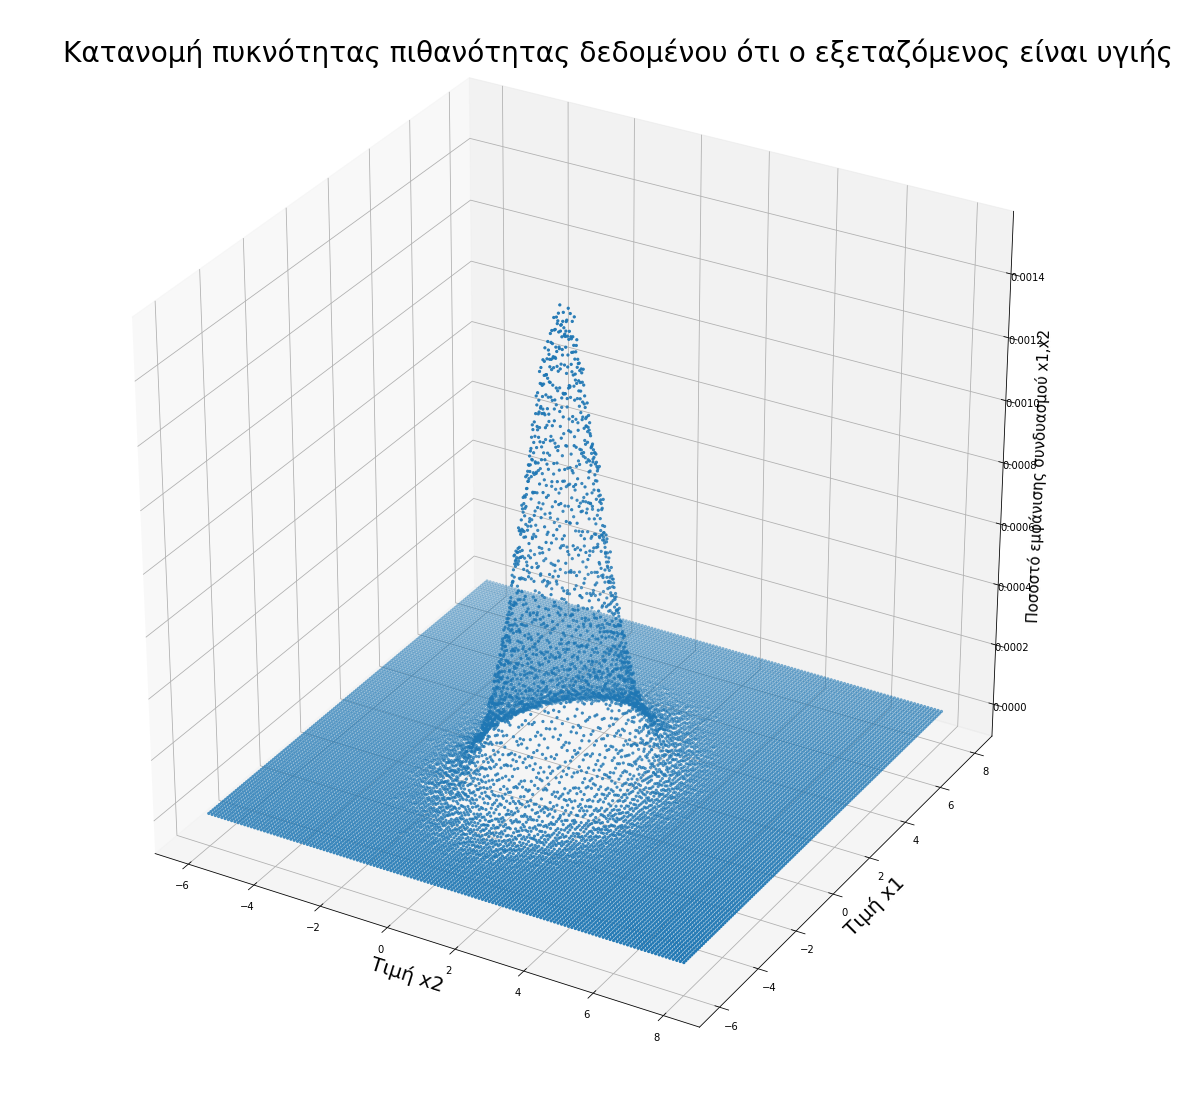

In [5]:
#Πλήθος των διακριτών τιμών
numOfDiscrete = 141
#minimum value of diagram
minVal = -6


#Αρχικοποιούμε με 0 τον πίνακα
p1 = np.zeros((numOfDiscrete*numOfDiscrete,3), dtype=float)

#Η πρώτη φορ γεμίζει την πρώτη στήλη με τιμές για Χ1 από -6 εώς 8 με βήμα 0.1 ανά 141 στοιχεία
for i in range(0, numOfDiscrete*numOfDiscrete, 1):
    a,d = divmod(i,numOfDiscrete)
    p1[i,0] = a/10 + minVal

#Η δεύτερη φορ γεμίζει την δεύτερη στήλη με τιμές για Χ2 από -6 εώς 8 με βήμα 0.1 ξαναξεκινώντας από το -6 όταν φτάνει στο 8
for j in range(0, numOfDiscrete*numOfDiscrete, 1):
    a,d = divmod(j,numOfDiscrete)
    p1[j,1] = d/10 + minVal 
    
#Κάθε στοιχείο της τρίτης στήλης του πίνακα λειτουργεί σαν counter προσθέτωντας 1 στον εαυτό του κάθε φορά που οι τιμές Χ1 και Χ2 μας δίνουν το index του
#Άρα όταν τελειώσει η φορ έχουν το πλήθος των φορών που εμφανίστηκε ο κάθε συνδυασμός
for i in range(0, numOfSamples, 1):
    index = 10*(samples1[i,0] - minVal)*numOfDiscrete + 10*(samples1[i,1] - minVal)
    index = int(index)
    p1[index, 2] +=1
    
#Διαιρούμε με το πλήθος των δειγμάτων για να πάρουμε την πιθανότητα
p1[:,2] /= numOfSamples 
print(p1)

#Δημιουργούμε ένα 3d figure
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection ='3d')

#Βάζουμε τις στήλες του πίνακα σαν ορίσματα ώστε να πάρουμε την εκτίμηση της pdf
ax.scatter(xs = p1[:,1], ys = p1[:,0], zs = p1[:,2], s = 5)


ax.text2D(0.05, 0.95, "Κατανομή πυκνότητας πιθανότητας δεδομένου ότι ο εξεταζόμενος είναι υγιής", transform=ax.transAxes, fontsize = 28)
ax.set_xlabel("Τιμή x2",fontsize = 20)
ax.set_ylabel("Τιμή x1",fontsize = 20)
ax.set_zlabel("Ποσοστό εμφάνισης συνδυασμού x1,x2",fontsize = 15)
plt.show()


Αθροίζουμε όλες τις πιθανότητες για να σιγουρευτούμε ότι δεν έχουν κάνει κάποιο λάθος και ότι το άθροισμα όλων κάνει 1

In [6]:
#Δημιουργούμε έναν counter και με την φορ περνάμε από όλους τους συνδυασμούς, για να σιγουρευτούμε ότι οι πιθανότητες αθροίζουν στο 1
pol1 = 0
for z in range(0, numOfDiscrete*numOfDiscrete, 1):
        pol1 += p1[z,2]
    
print(pol1)

0.999999999999994


Ακριβώς όπως για την προηγούμενη κατανομή, κάνουμε την ίδια διαδικασία για samples2 και τελικά παίρνουμε πάλι κάτι τέτοιο:

[-6, -6, πιθανοτητα[-6, 6]]

[-6, -5.9, πιθανοτητα[-6, 5.9]]

[-6, 5.8, πιθανοτητα[-6, 5.8]]

...

[-5, -6, πιθανοτητα[-5, 6]]

[-5, -5.9, πιθανοτητα[-5, 5.9]]

...

[6, 5.9, πιθανοτητα[6, 5.9]]

[6, 6, πιθανοτητα[6, 6]]  κτλ

Στην συνέχεια τον εκτυπώνουμε για να δούμε και την κατανομή

[[-6.  -6.   0. ]
 [-6.  -5.9  0. ]
 [-6.  -5.8  0. ]
 ...
 [ 8.   7.8  0. ]
 [ 8.   7.9  0. ]
 [ 8.   8.   0. ]]


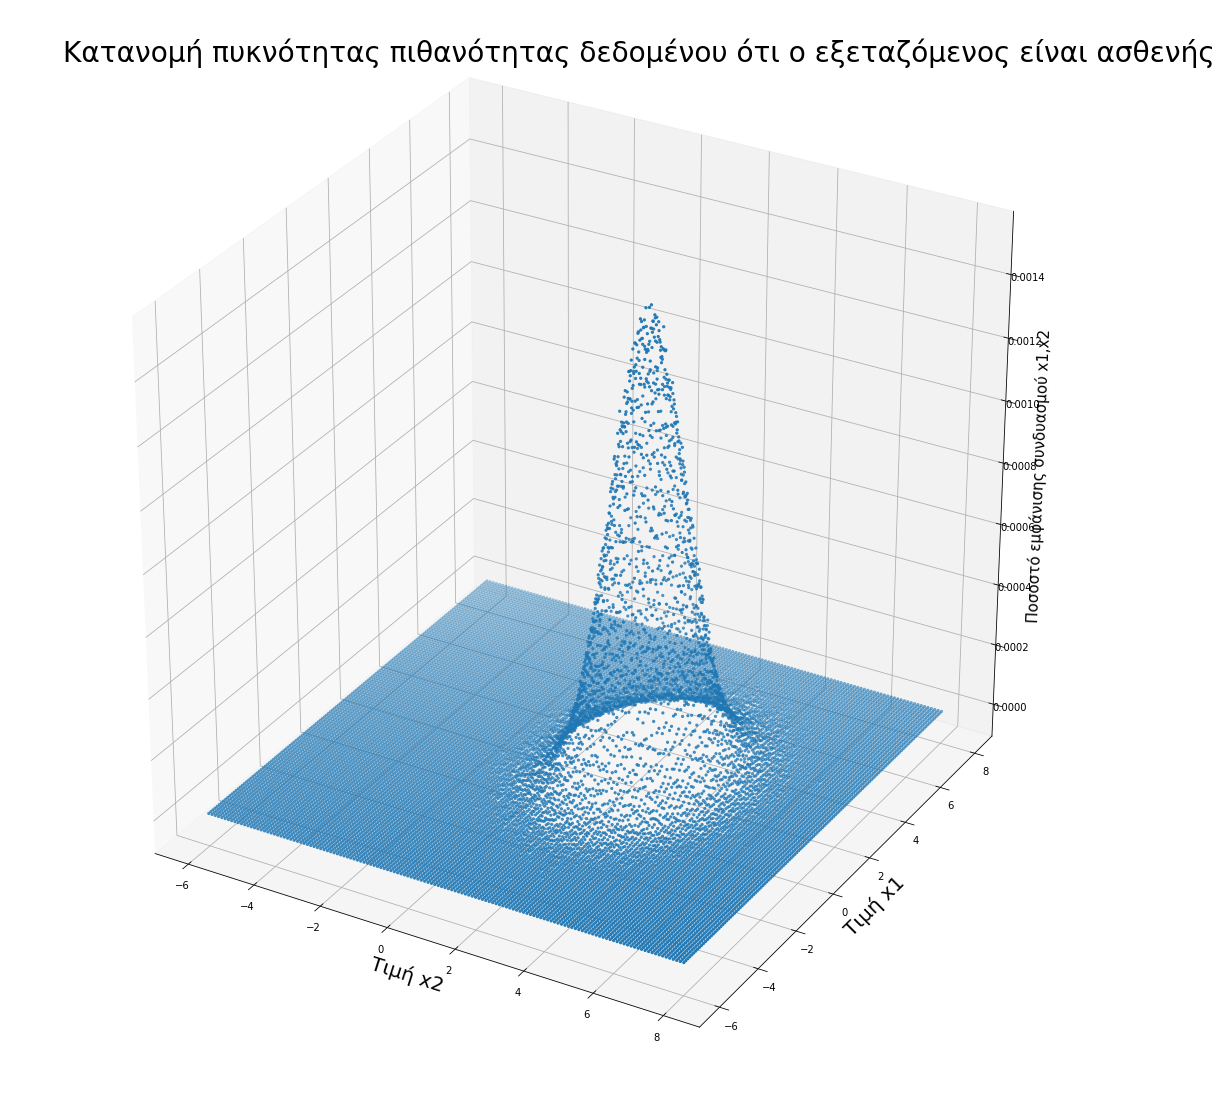

In [7]:
#Αρχικοποίηση
p2 = np.zeros((numOfDiscrete*numOfDiscrete,3), dtype=float)

#Οι δυο πρώτες στήλες είναι ολόιδιες με τον p1 οπότε απλά τις αντιγράφουμε απο αυτόν
#Γέμισμα 1ης στήλης
p2[: , 0] = p1[: , 0]

#Γέμισμα 2ης στήλης
p2[: , 1] = p1[: , 1]
    
#Γέμισμα 3ης στήλης
for i in range(0, numOfSamples, 1):
    index = 10*(samples2[i,0] - minVal)*numOfDiscrete + 10*(samples2[i,1] - minVal)
    index = int(index)
    p2[index, 2] +=1
    
#Διαίρεση με πλήθος για υπολογισμό πιθανότητας
p2[:,2] /= numOfSamples
print(p2)

#Δημιουργία 3d figure
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection ='3d')

#Βάζουμε τις στήλες του πίνακα σαν ορίσματα ώστε να πάρουμε την εκτίμηση της pdf
ax.scatter(xs = p2[:,1], ys = p2[:,0], zs = p2[:,2],s=5)
ax.text2D(0.05, 0.95, "Κατανομή πυκνότητας πιθανότητας δεδομένου ότι ο εξεταζόμενος είναι ασθενής", transform=ax.transAxes, fontsize = 28)
ax.set_xlabel("Τιμή x2",fontsize = 20)
ax.set_ylabel("Τιμή x1",fontsize = 20)
ax.set_zlabel("Ποσοστό εμφάνισης συνδυασμού x1,x2",fontsize = 15)
plt.show()




Αθροίζουμε όλες τις πιθανότητες για να σιγουρευτούμε ότι δεν έχουν κάνει κάποιο λάθος και ότι το άθροισμα όλων κάνει 1

In [8]:
pol2 = 0
for z in range(0, numOfDiscrete*numOfDiscrete, 1):
        pol2 += p2[z,2]
    
print(pol2)

0.9999999999999925


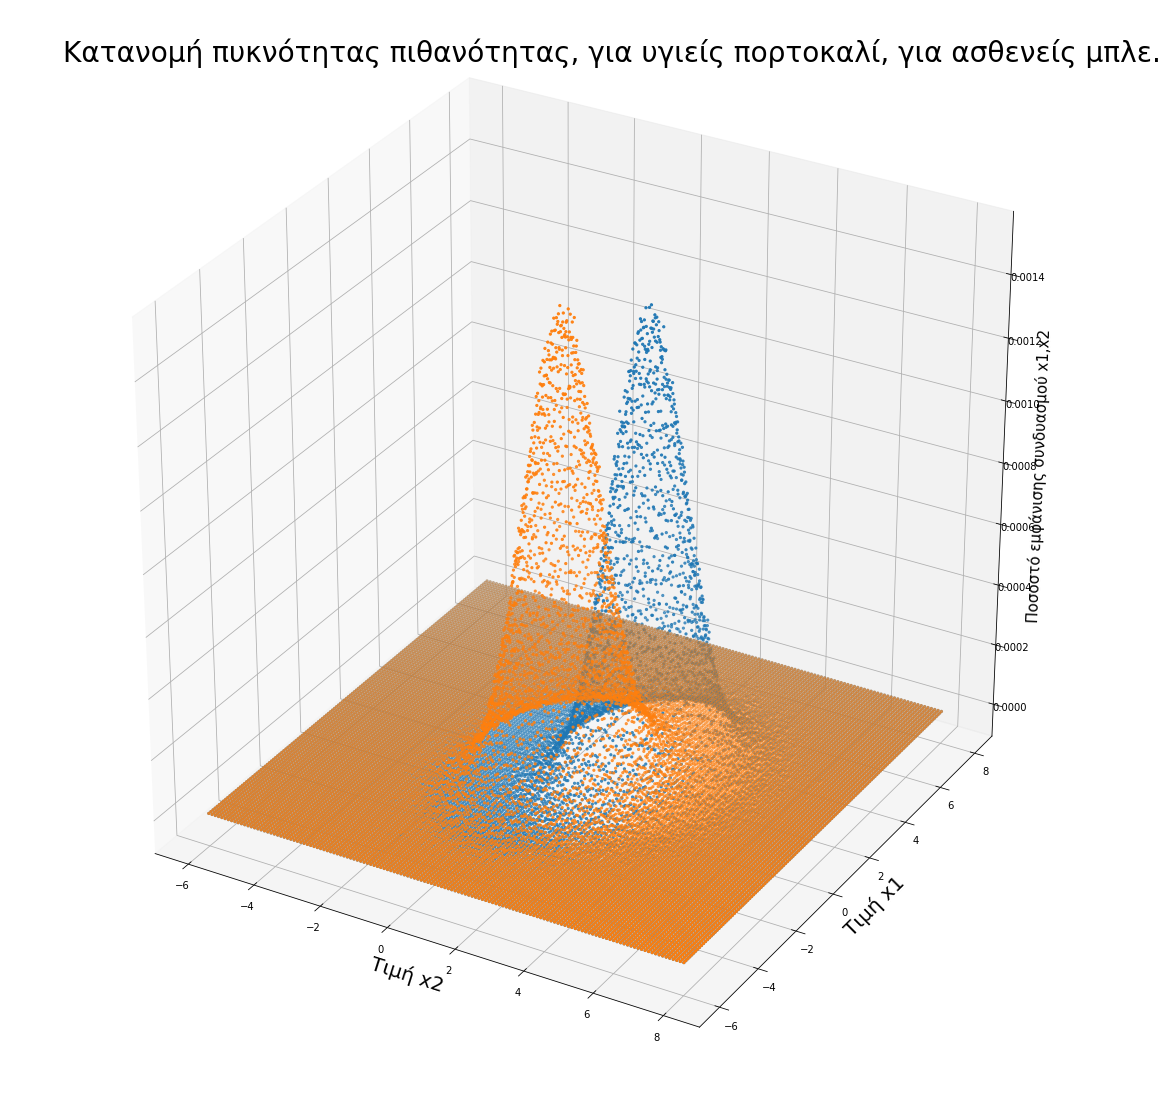

In [9]:
#Πλοτάρουμε και τις δύο κατανομές μαζί, πορτοκαλί για υγιείς και μπλε για ασθενείς
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection ='3d')


ax.scatter(xs = p2[:,1], ys = p2[:,0], zs = p2[:,2], label='w2',s=5)
ax.scatter(xs = p1[:,1], ys = p1[:,0], zs = p1[:,2], label='w1',s=5)

ax.text2D(0.05, 0.95, "Κατανομή πυκνότητας πιθανότητας, για υγιείς πορτοκαλί, για ασθενείς μπλε.", transform=ax.transAxes, fontsize = 28)
ax.set_xlabel("Τιμή x2",fontsize = 20)
ax.set_ylabel("Τιμή x1",fontsize = 20)
ax.set_zlabel("Ποσοστό εμφάνισης συνδυασμού x1,x2",fontsize = 15)

plt.show()


Από το παραπάνω διάγραμμα φαίνεται οι ασθενείς παρασιάζουν αυξημένες τιμές τόσο για τον μικροβιολογικό δείκτη Χ1, όσο και για τον Χ2. Έτσι ένας γιατρός θα υποπτευόταν ότι η ταυτόχρονη παρουσία δύο υψηλών τιμών και για τους δύο μικροβιολογικούς δείκτες θα ήταν μια ένδειξη για την ύπαρξη καρκίνου.

Επίσης εμφανή γίνονται και τα διαστήματα κατά τα οποία οι τιμές των Χ1 και Χ2 θα μπορούσαν να θεωρηθούν φυσιολογικές

### Ερώτημα 2ο
Υπολογίζουμε την συνολική κατανομή p(x) με τον τύπο p(x) = p(x|ω1)*p(ω1) + p(x|ω2)*p(ω2) και την εμφανίζουμε.

Για να γίνει αυτό ουσιαστικά φτιάχνουμε έναν 3ο πίνακα ο οποίος έχει τις δύο πρώτες στήλες ίδες ενώ για την τρίτη χρησιμοποιούμε τον παραπάνω τύπο για κάθε συνδυασμό διακριτών τιμών για να υπολογίσουμε την συνολική κατανομή.

[[-6.  -6.   0. ]
 [-6.  -5.9  0. ]
 [-6.  -5.8  0. ]
 ...
 [ 8.   7.8  0. ]
 [ 8.   7.9  0. ]
 [ 8.   8.   0. ]]


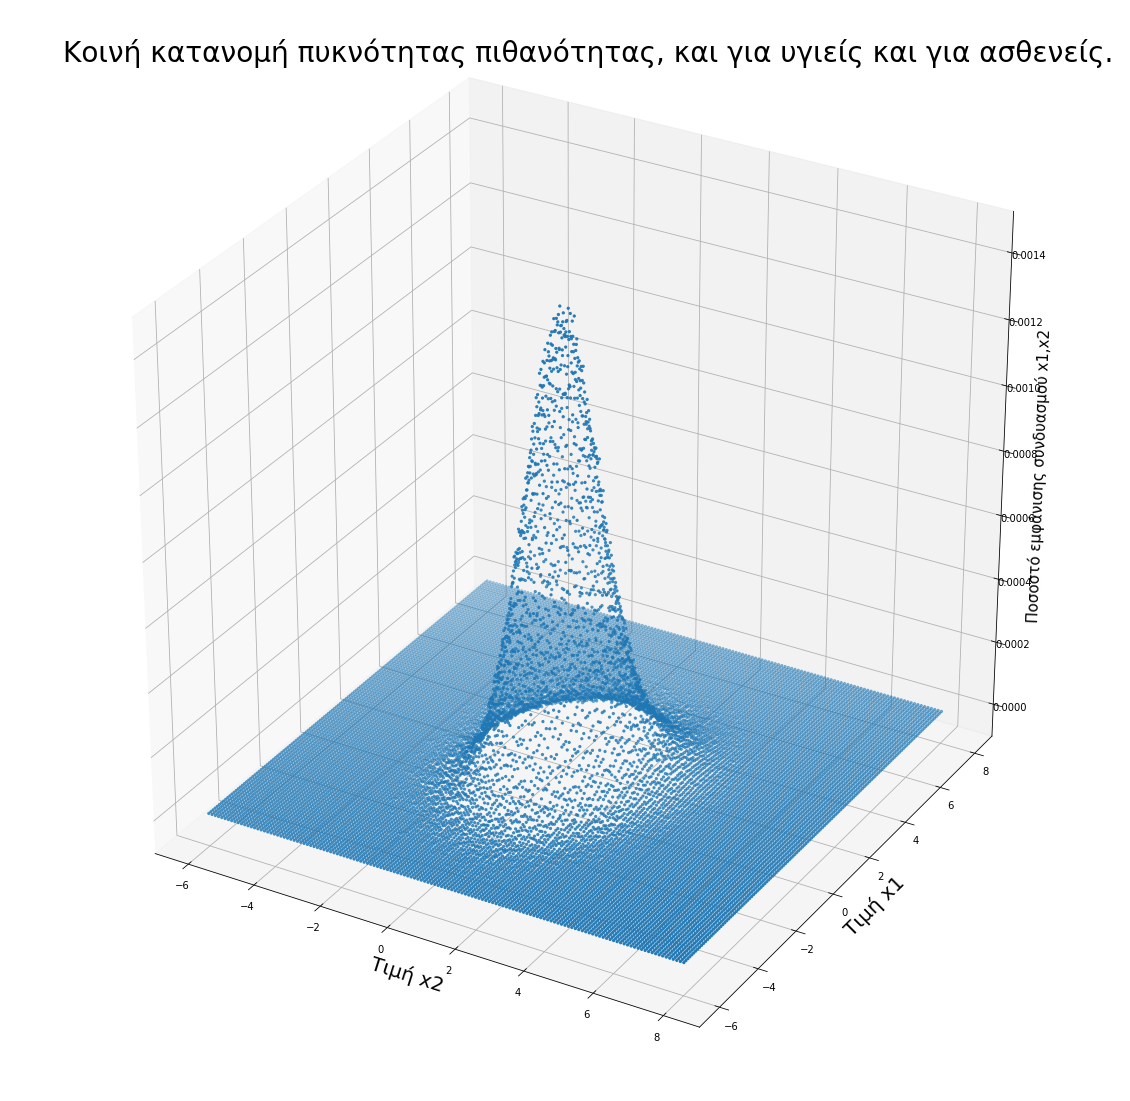

In [10]:
#όπως και πριν αρχικοποιούμε με 0 τον πίνακα αντιγράφουμε τις δυο πρώτες στήλες από τον p1
ptotal = np.zeros((numOfDiscrete*numOfDiscrete,3), dtype=float)

ptotal[: , 0] = p1[: , 0]
ptotal[: , 1] = p1[: , 1]

#Για κάθε συνδυασμό Χ1-Χ2 υπολογίζεται η πιθανότητα και αποθηκεύεται στην 3η στήλη
for z in range(0, numOfDiscrete*numOfDiscrete, 1):
    ptotal[z,2] = p1[z,2]*0.95 + p2[z,2]*0.05
    
print(ptotal)

#πλοτάρουμε
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection ='3d')

ax.scatter(xs = ptotal[:,1], ys = ptotal[:,0], zs = ptotal[:,2], s=5) 
ax.text2D(0.05, 0.95, "Κοινή κατανομή πυκνότητας πιθανότητας, και για υγιείς και για ασθενείς.", transform=ax.transAxes, fontsize = 28)
ax.set_xlabel("Τιμή x2",fontsize = 20)
ax.set_ylabel("Τιμή x1",fontsize = 20)
ax.set_zlabel("Ποσοστό εμφάνισης συνδυασμού x1,x2",fontsize = 15)
plt.show()


Στην κοινή κατανομή βλέπουμε πως κατανείμονται τα Χ1 και Χ2 όταν δεν γνωρίζουμε τίποτα εκ των προτέρων για τους εξεταζόμενους. Από εδώ μπορούμε να καταλάβουμε ότι τιμές εκτός των συγκεκριμένων διαστημάτων ίσως να μην είναι σωστές και να πρόκειται για "anomaly" είτε λόγω κάποιου λάθους, είτε σφάλματος του μηχανήματος. Άρα πιθανώς θα έπρεπε να ξαναπραγματοποιηθεί η εξέταση για να είμαστε σίγουροι ότι έχουμε σωστό αποτέλεσμα.

Αθροίζουμε όλες τις πιθανότητες για να σιγουρευτούμε ότι δεν έχουν κάνει κάποιο λάθος και ότι το άθροισμα όλων κάνει 1

In [11]:
pol3 = 0
for z in range(0, numOfDiscrete*numOfDiscrete, 1):
        pol3 += ptotal[z,2]
    
print(pol3)

0.9999999999999934


### Ερώτημα 3ο

Υπολογίζουμε την ποστεριόρι πιθανότητα, δηλαδή την πιθανότητα κάποιος να έιναι υγιής με δεδομένες τιμές για το διάνυσμα x με βάση τον τύπο p(ω1|x) = p(x|ω1)*p(ω1)/p(x) και την πλοτάρουμε.

Για να γίνει αυτό έχουμε πάλι τις δύο πρώτες στήλες ίδιες και η 3η χρησιμοποιεί τον παραπάνω τύπο σε κάθε συνδυασμό για τον υπολογισμό της πιθανότητας

[[-6.  -6.   0. ]
 [-6.  -5.9  0. ]
 [-6.  -5.8  0. ]
 ...
 [ 8.   7.8  0. ]
 [ 8.   7.9  0. ]
 [ 8.   8.   0. ]]


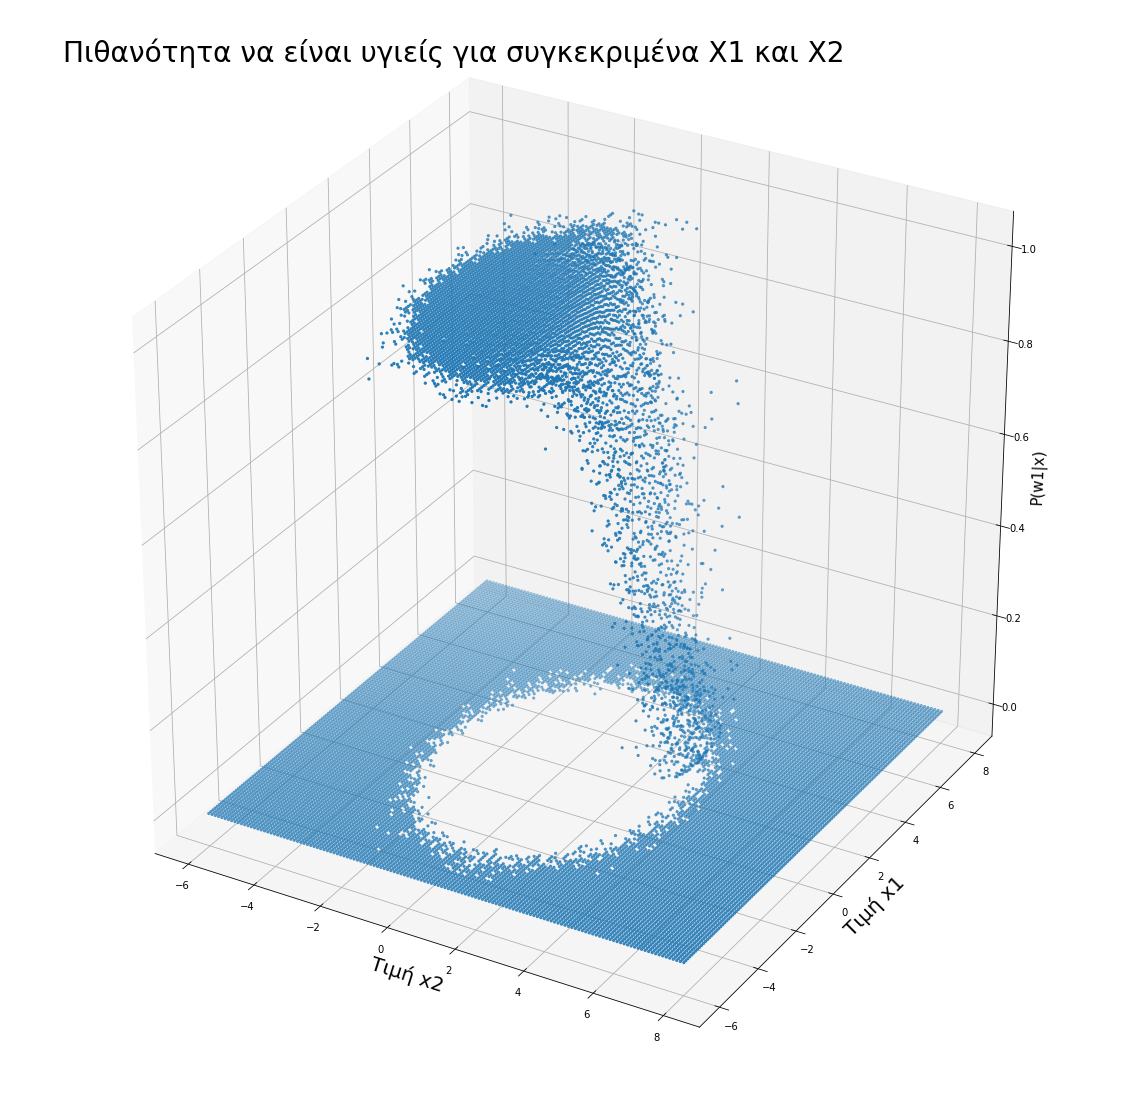

In [12]:
#Αρχικόποιούμε τον πίνακα
pw1x = np.zeros((numOfDiscrete*numOfDiscrete,3), dtype=float)

#γεμίζουμε με όλους τους συνδυασμούς Χ1-Χ2
pw1x[: , 0] = p1[: , 0]
pw1x[: , 1] = p1[: , 1]
    
#Υπολογίζουμε για κάθε συνδυασμό Χ1-Χ2 με βάση τον παραπάνω τύπο την πιθανότητα
#εκ των υστέρων και την αποθηκεύουμε στο αντίστοιχο index
for z in range(0, numOfDiscrete*numOfDiscrete, 1):
    if ptotal[z,2] == 0:
        pw1x[z,2] = 0
    else:
        pw1x[z,2] = p1[z,2]*0.95/ptotal[z,2]
        
print(pw1x)

#plot-άρουμε την p(w1|x)
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection ='3d')

ax.scatter(xs = pw1x[:,1], ys = pw1x[:,0], zs = pw1x[:,2], s=5)
ax.text2D(0.05, 0.95, "Πιθανότητα να είναι υγιείς για συγκεκριμένα Χ1 και Χ2", transform=ax.transAxes, fontsize = 28)
ax.set_xlabel("Τιμή x2",fontsize = 20)
ax.set_ylabel("Τιμή x1",fontsize = 20)
ax.set_zlabel("P(w1|x)",fontsize = 15)
plt.show()

Υπολογίζουμε την ποστεριόρι πιθανότητα, δηλαδή την πιθανότητα κάποιος να έιναι ασθενής με δεδομένες τιμές για το διάνυσμα x με βάση τον τύπο p(ω2|x) = p(x|ω2)*p(ω2)/p(x) και την πλοτάρουμε σε συνδυασμό με την p(ω1|X).
Ουσιαστικά αν έχουμε έναν ασθενή με συγκεκριμένες τιμές Χ θα λέμε ότι λογικά είναι υγιής αν η p(ω1|x) > p(ω2|x) (δηλαδή όπου η πορτοκαλί κατανομή είναι πάνω από την μπλέ, ενώ αλλιώς θα λέμε ότι μάλλον είναι ασθενής.

[[-6.  -6.   0. ]
 [-6.  -5.9  0. ]
 [-6.  -5.8  0. ]
 ...
 [ 8.   7.8  0. ]
 [ 8.   7.9  0. ]
 [ 8.   8.   0. ]]


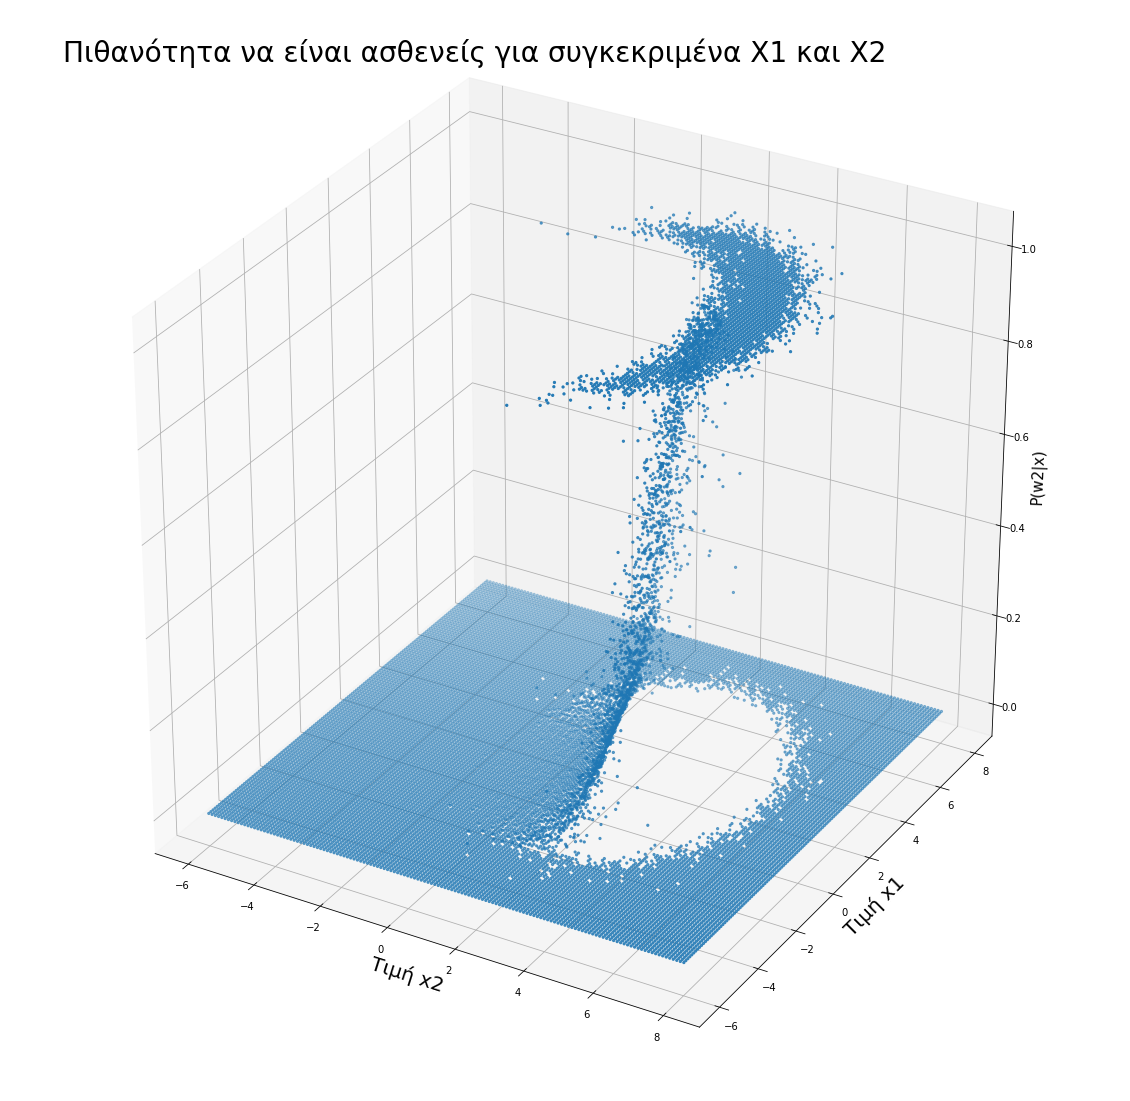

In [13]:
#Αρχικόποιούμε τον πίνακα
pw2x = np.zeros((numOfDiscrete*numOfDiscrete,3), dtype=float)

#γεμίζουμε με όλους τους συνδυασμούς Χ1-Χ2
pw2x[: , 0] = p1[: , 0]
pw2x[: , 1] = p1[: , 1]
    
#Υπολογίζουμε για κάθε συνδυασμό Χ1-Χ2 με βάση τον παραπάνω τύπο την πιθανότητα
#εκ των υστέρων και την αποθηκεύουμε στο αντίστοιχο index
for z in range(0, numOfDiscrete*numOfDiscrete, 1):
    if ptotal[z,2] == 0:
        pw2x[z,2] = 0
    else:
        pw2x[z,2] = p2[z,2]*0.05/ptotal[z,2]
        
print(pw2x)
#plot-άρουμε την p(w1|x)
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection ='3d')
ax.text2D(0.05, 0.95, "Πιθανότητα να είναι ασθενείς για συγκεκριμένα Χ1 και Χ2", transform=ax.transAxes, fontsize = 28)
ax.set_xlabel("Τιμή x2",fontsize = 20)
ax.set_ylabel("Τιμή x1",fontsize = 20)
ax.set_zlabel("P(w2|x)",fontsize = 15)

ax.scatter(xs = pw2x[:,1], ys = pw2x[:,0], zs = pw2x[:,2], label = "W1", s=5)

plt.show()

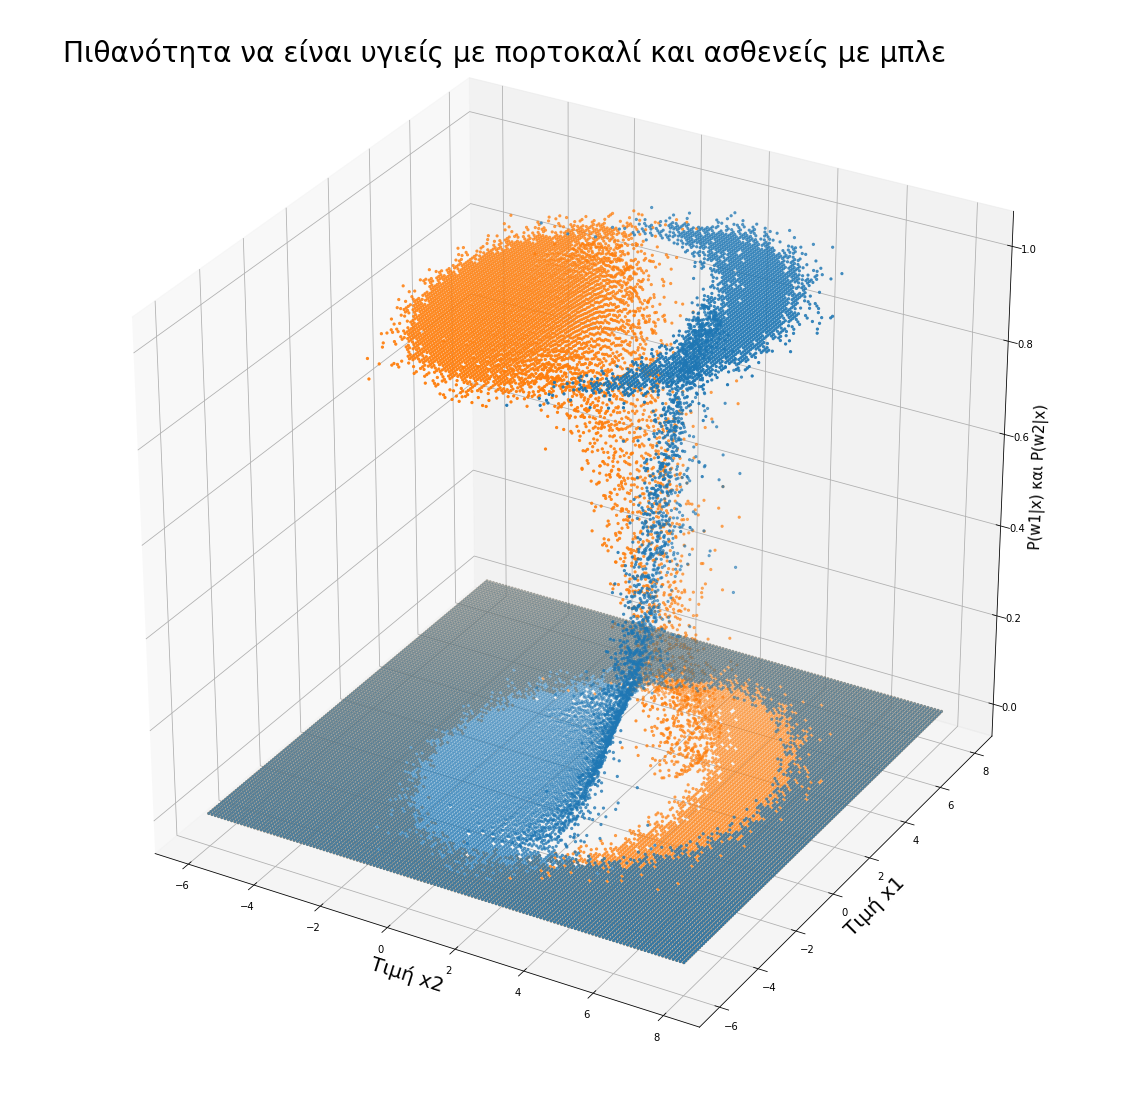

In [14]:
#Απλά επαναλαμβάνουμε τα πλοτς, ώστε να τα βάλουμε και στην ίδια γραφική παράσταση
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection ='3d')

ax.scatter(xs = pw2x[:,1], ys = pw2x[:,0], zs = pw2x[:,2], label = "W1", s=5)
ax.scatter(xs = pw1x[:,1], ys = pw1x[:,0], zs = pw1x[:,2], label = "W2", s=5)

ax.text2D(0.05, 0.95, "Πιθανότητα να είναι υγιείς με πορτοκαλί και ασθενείς με μπλε", transform=ax.transAxes, fontsize = 28)
ax.set_xlabel("Τιμή x2",fontsize = 20)
ax.set_ylabel("Τιμή x1",fontsize = 20)
ax.set_zlabel("P(w1|x) και P(w2|x)",fontsize = 15)

plt.show()

Όπως γίνεται προφανές, οι εξεταζόμενοι που βγάζουν τιμές που ανήκουν στο μπλέ "μισοφέγγαρο" που σχηματίζεται στην κορυφή είμαστε σχεδόν βέβαιοι ότι πάσχουν. Αντίθετα όσοι βρίσκονται στο πορτοκαλί "ημικύκλιο που σχηματίζεται κοντά στην πιθανότητα 1, είμαστε σχεδόν σίγουροι ότι δεν πάσχουν. Για τις τιμές που ανήκουν στους δύο καταράκτες ανάμεσα από τα παραπάνω δέν μπορούμε να είμαστε και πολύ σίγουροι, οπότε η πιθανότητα σφάλματος είναι και πολύ μεγαλύτερη.
Συνεπώς στην τελευταία περίπτωση ίσως πραγματοποιούνταν και κάποια άλλου είδους εξέταση για διασταύρωση των αποτελεσμάτων.

### Ερώτημα 4ο
Υπολογίζουμε το σφάλμα, αφού είναι το άθροισμα της πιθάνοτητας να επιλέξουμε το ω1 ενώ είναι το ω2 και της πιθανότητας να είναι το ω2 ενώ επιλέξαμε το ω1. Ουσιαστικά εφαρμόζουμε τον τύπο: P(error) = Σ (P(error|x)*P(x)) 


In [15]:
#θέτουμε το error 0
perror = 0

#Υπολογίζουμε για κάθε index (πιθανό συνδυασμό Χ1-Χ2) την πιθανότητα σφάλματος
#ξεχωριστά χρησιμοποιώντας τον πάνω τύπο και τα αθροίζουμε στο έρρορ  
for z in range(0, numOfDiscrete*numOfDiscrete, 1):
    if pw1x[z,2] >= pw2x[z,2]:
        perror += pw2x[z,2]*ptotal[z,2]
    else:
        perror += pw1x[z,2]*ptotal[z,2]
print("Το σφάλμα κατά Bayes είναι: ", perror)

Το σφάλμα κατά Bayes είναι:  0.03440495000000007


Το σφάλμα αυτό, ουσιαστικά αποτελεί το ποσοστό των False positives αλλά και των False negatives στο σύνολο των προβλέψεων. Σε ένα πιο ρεαλιστικό σενάριο δεν θα παίρναμε την απόφαση κατά bayes και θα μας ενδιέφερε πολύ περισσότερο να μην έχουμε σχεδόν καθόλου false negatives, ενώ δεν θα μας πείραζε τόσο το να έχουμε false positives (αφού συνήθως θα γίνεται και κάποια άλλη πρόβλεψη για επιβεβαίωση). Έτσι μπορεί το σφάλμα κατα bayes να είναι το μικρότερο που θα μπορούσαμε να έχουμε με αυτά τα δεδομένα, αλλά δεν θα ήταν απαραίτητα η βέλτιστη απόφαση που θα μπορούσαμε να πάρουμε.

## Μέρος Β'
Τώρα θα επαναλάβουμε την διαδικασία και για την περίπτωση που ο πίνακας συμμεταβλητότητας για την δεύτερη κατανομή είναι Σ2 = Σ/4

### Ερώτημα 1ο

Η κατανομή δεδομέονου του ω1 (υγιής) θα μείνει ίδια, οπότε πειράζουμε μόνο την κατανομή για ω2 (ασθενής). 

In [16]:

cov2 = [[1.5/4, 0], [0, 0.2]]

#Όπως και πάνω αποθηκεύουμε στον (1000000x2) πίνακα samples2 τυχαίες τιμές από μια κανονική κατανομή 
#πολλών μεταβλητών με βάση τις μέσες τιμές στο mu2 αλλά με τον ίδιο πίνακα ετεροσυσχέτισης με πριν
samples2 = np.random.multivariate_normal(mu2, cov2, size=numOfSamples)
#Στρογγυλοποίηση ανά 0.1
np.around(samples2, decimals=1, out=samples2)
#Εκτύπωση για επαλήθευση
print(samples2)

#Αρχικοποίηση
p2 = np.zeros((numOfDiscrete*numOfDiscrete,3), dtype=float)

#Οι δυο πρώτες στήλες είναι ολόιδιες με τον p1 οπότε απλά τις αντιγράφουμε απο αυτόν
#Γέμισμα 1ης στήλης
p2[: , 0] = p1[: , 0]

#Γέμισμα 2ης στήλης
p2[: , 1] = p1[: , 1]
    
#Γέμισμα 3ης στήλης
for i in range(0, numOfSamples, 1):
    index = 10*(samples2[i,0] - minVal)*numOfDiscrete + 10*(samples2[i,1] - minVal)
    index = int(index)
    p2[index, 2] +=1
    
#Διαίρεση με πλήθος για υπολογισμό πιθανότητας
p2[:,2] /= numOfSamples
print(p2)


[[1.1 1.6]
 [1.2 2.1]
 [1.2 3. ]
 ...
 [1.7 2.2]
 [0.7 2.2]
 [2.  3.3]]
[[-6.  -6.   0. ]
 [-6.  -5.9  0. ]
 [-6.  -5.8  0. ]
 ...
 [ 8.   7.8  0. ]
 [ 8.   7.9  0. ]
 [ 8.   8.   0. ]]


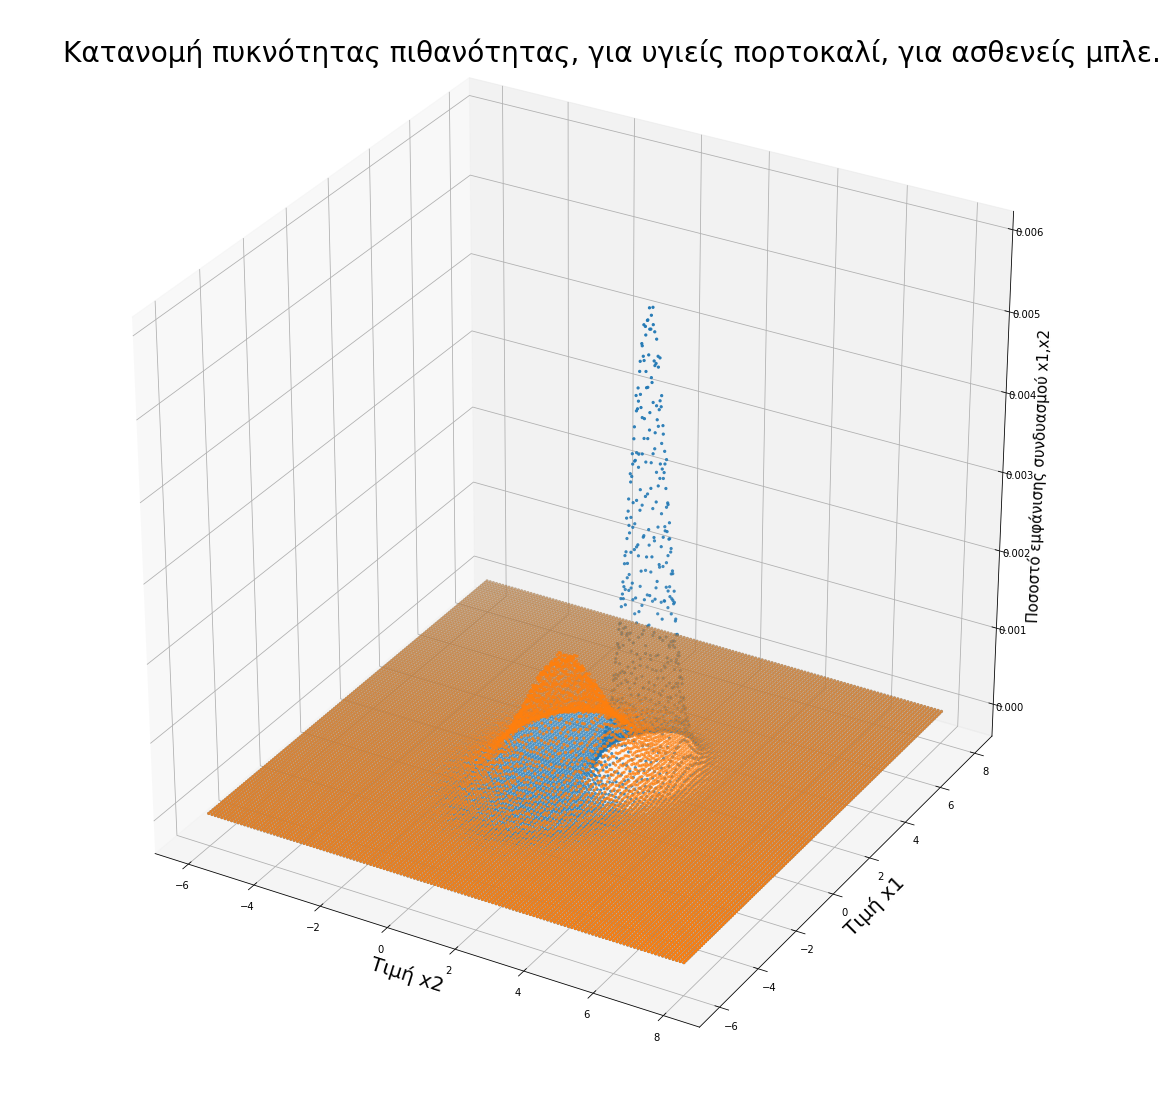

In [17]:
#Πλοτάρουμε και τις δύο κατανομές μαζί, πορτοκαλί για υγιείς και μπλε για ασθενείς
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection ='3d')


ax.scatter(xs = p2[:,1], ys = p2[:,0], zs = p2[:,2], label='w2',s=5)
ax.scatter(xs = p1[:,1], ys = p1[:,0], zs = p1[:,2], label='w1',s=5)

ax.text2D(0.05, 0.95, "Κατανομή πυκνότητας πιθανότητας, για υγιείς πορτοκαλί, για ασθενείς μπλε.", transform=ax.transAxes, fontsize = 28)
ax.set_xlabel("Τιμή x2",fontsize = 20)
ax.set_ylabel("Τιμή x1",fontsize = 20)
ax.set_zlabel("Ποσοστό εμφάνισης συνδυασμού x1,x2",fontsize = 15)

plt.show()


Όπως βλέπουμε στην παραπάνω κατανομή, επειδή η διασπορά για ω2 είναι μικρότερη, οι τιμές είναι μαζεμένες σε πιο μικρό διάστημα x. Για αυτόν τον λόγο και η πινανότητα για κάθε διακριτή τιμή είναι συγκριτικά μεγαλύτερη από ότι για ω1. Αυτό μας βοηθάει αρκετά στο να είμαστε πιο σίγουροι όταν παίρνουμε απόφαση κατά bayes.

---



### Ερώτημα 2ο

[[-6.  -6.   0. ]
 [-6.  -5.9  0. ]
 [-6.  -5.8  0. ]
 ...
 [ 8.   7.8  0. ]
 [ 8.   7.9  0. ]
 [ 8.   8.   0. ]]


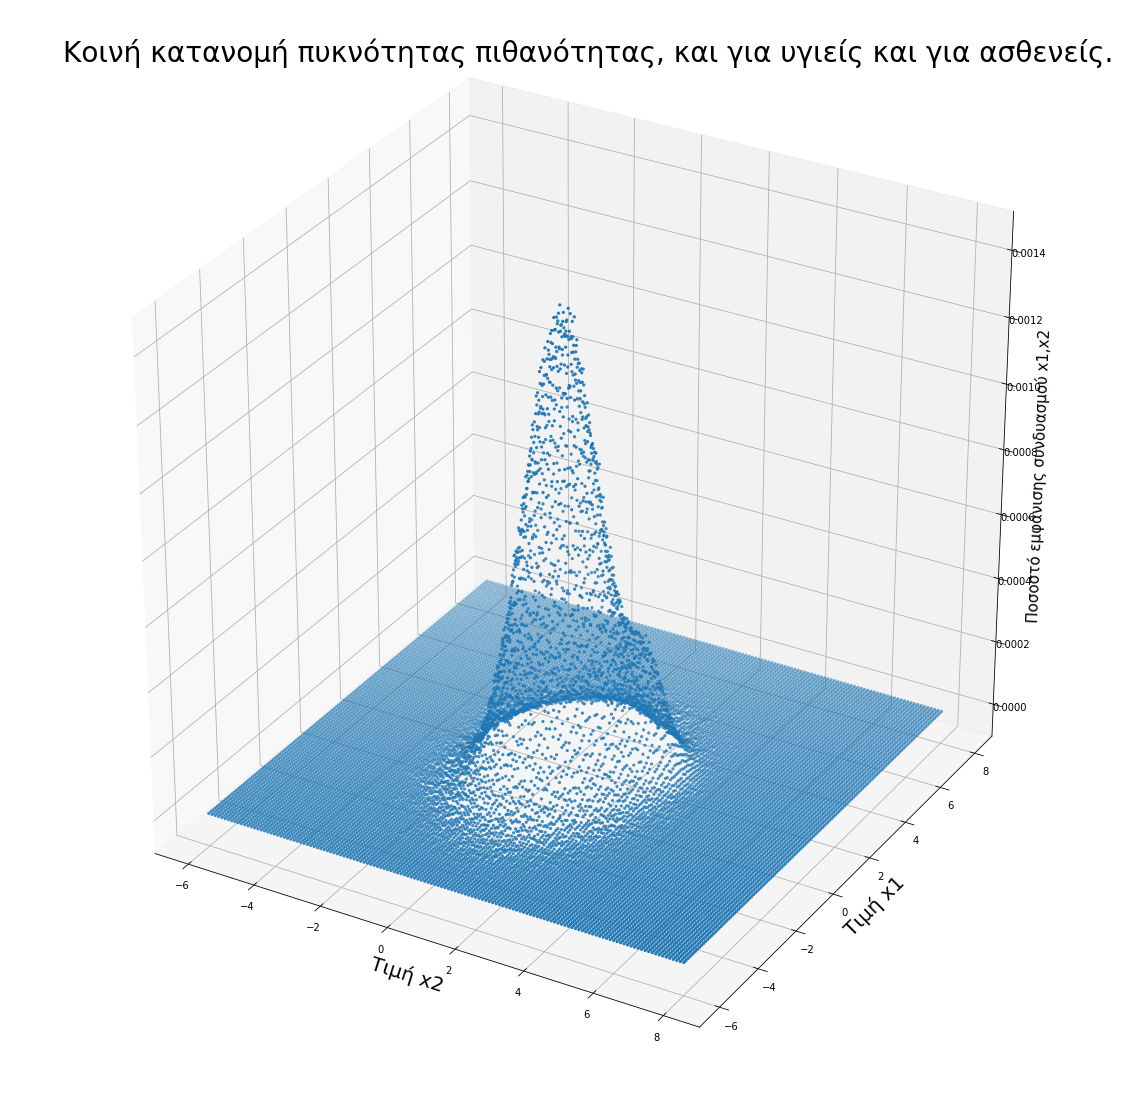

In [18]:
#όπως και πριν αρχικοποιούμε με 0 τον πίνακα αντιγράφουμε τις δυο πρώτες στήλες από τον p1
ptotal2 = np.zeros((numOfDiscrete*numOfDiscrete,3), dtype=float)

ptotal2[: , 0] = p1[: , 0]
ptotal2[: , 1] = p1[: , 1]

#Για κάθε συνδυασμό Χ1-Χ2 υπολογίζεται η πιθανότητα και αποθηκεύεται στην 3η στήλη
for z in range(0, numOfDiscrete*numOfDiscrete, 1):
    ptotal2[z,2] = p1[z,2]*0.95 + p2[z,2]*0.05
    
print(ptotal2)

#πλοτάρουμε
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection ='3d')

ax.scatter(xs = ptotal2[:,1], ys = ptotal2[:,0], zs = ptotal2[:,2], s=5) 
ax.text2D(0.05, 0.95, "Κοινή κατανομή πυκνότητας πιθανότητας, και για υγιείς και για ασθενείς.", transform=ax.transAxes, fontsize = 28)
ax.set_xlabel("Τιμή x2",fontsize = 20)
ax.set_ylabel("Τιμή x1",fontsize = 20)
ax.set_zlabel("Ποσοστό εμφάνισης συνδυασμού x1,x2",fontsize = 15)
plt.show()

### Ερώτημα 3ο
Υπολογίζουμε την ποστεριόρι πιθανότητα, δηλαδή την πιθανότητα κάποιος να έιναι υγιής με δεδομένες τιμές για το διάνυσμα x με βάση τον τύπο p(ω1|x) = p(x|ω1)*p(ω1)/p(x) και την πλοτάρουμε. Ομοίως και για p(x|ω2)

Για να γίνει αυτό έχουμε πάλι τις δύο πρώτες στήλες ίδιες και η 3η χρησιμοποιεί τον παραπάνω τύπο σε κάθε συνδυασμό για τον υπολογισμό της πιθανότητας

[[-6.  -6.   0. ]
 [-6.  -5.9  0. ]
 [-6.  -5.8  0. ]
 ...
 [ 8.   7.8  0. ]
 [ 8.   7.9  0. ]
 [ 8.   8.   0. ]]
[[-6.  -6.   0. ]
 [-6.  -5.9  0. ]
 [-6.  -5.8  0. ]
 ...
 [ 8.   7.8  0. ]
 [ 8.   7.9  0. ]
 [ 8.   8.   0. ]]


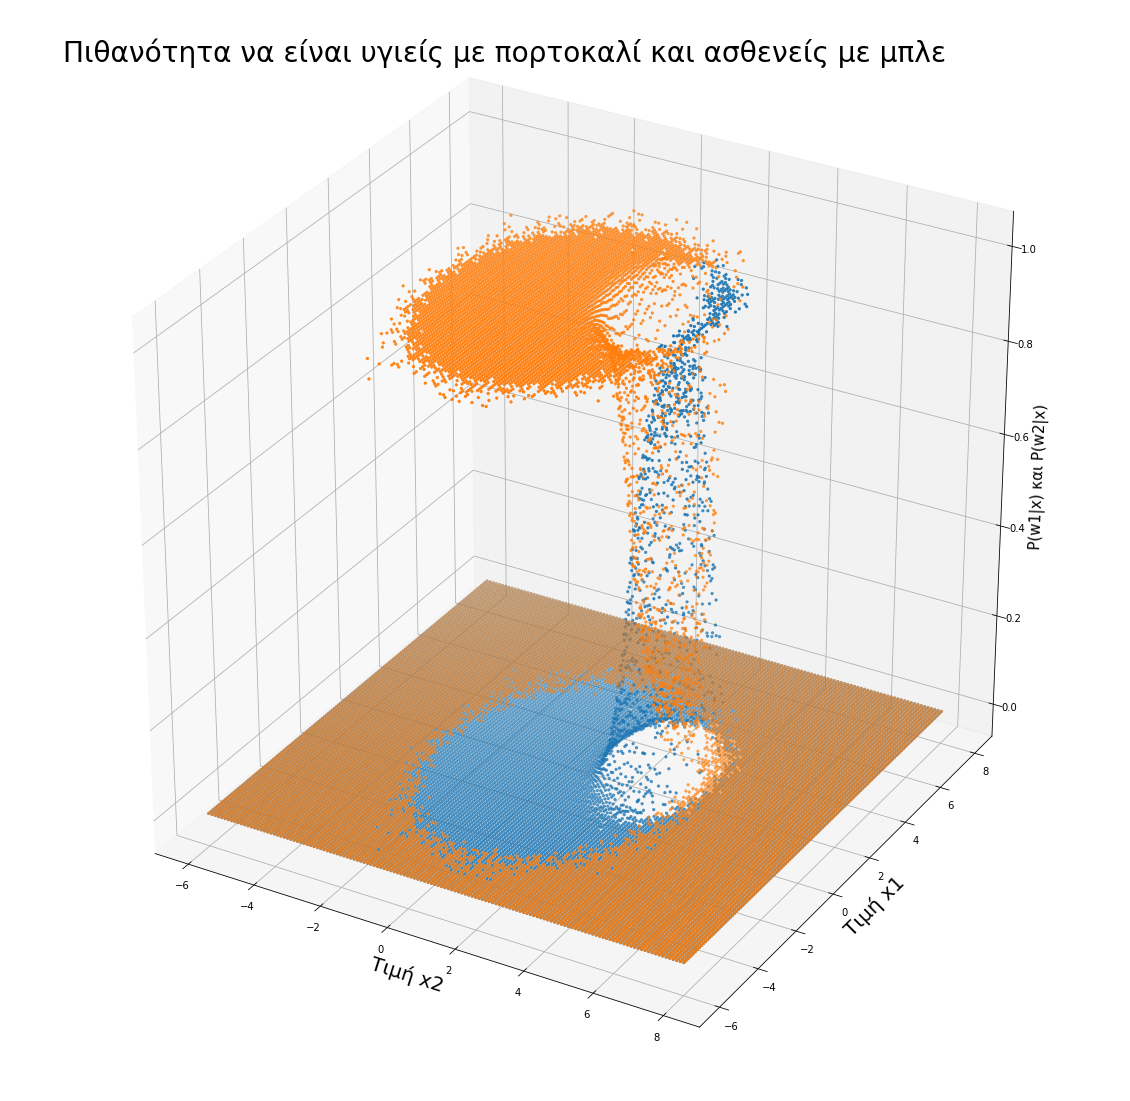

In [19]:
pw1x = np.zeros((numOfDiscrete*numOfDiscrete,3), dtype=float)

pw1x[: , 0] = p1[: , 0]
pw1x[: , 1] = p1[: , 1]
    
for z in range(0, numOfDiscrete*numOfDiscrete, 1):
    if ptotal2[z,2] == 0:
        pw1x[z,2] = 0
    else:
        pw1x[z,2] = p1[z,2]*0.95/ptotal2[z,2]
        
print(pw1x)


pw2x = np.zeros((numOfDiscrete*numOfDiscrete,3), dtype=float)

pw2x[: , 0] = p1[: , 0]
pw2x[: , 1] = p1[: , 1]
    
for z in range(0, numOfDiscrete*numOfDiscrete, 1):
    if ptotal2[z,2] == 0:
        pw2x[z,2] = 0
    else:
        pw2x[z,2] = p2[z,2]*0.05/ptotal2[z,2]
        
print(pw2x)

fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection ='3d')

ax.scatter(xs = pw2x[:,1], ys = pw2x[:,0], zs = pw2x[:,2], label = "W1", s=5)
ax.scatter(xs = pw1x[:,1], ys = pw1x[:,0], zs = pw1x[:,2], label = "W2", s=5)

ax.text2D(0.05, 0.95, "Πιθανότητα να είναι υγιείς με πορτοκαλί και ασθενείς με μπλε", transform=ax.transAxes, fontsize = 28)
ax.set_xlabel("Τιμή x2",fontsize = 20)
ax.set_ylabel("Τιμή x1",fontsize = 20)
ax.set_zlabel("P(w1|x) και P(w2|x)",fontsize = 15)

plt.show()

Έχοντας διαιρέσει όλα τα στοιχεία του πίνακα συμμεταβλητότητας με το 4 για την κατανομή των ασθενών, βλέπουμε ότι το "μισοφέγγαρο" μας από πριν έχει γίνει πολύ μικρότερο, ενώ η πορτοκαλί περιοχή έχει αυξηθεί σημαντικά. Για αυτόν τον λόγο, τα διαστήματα που λαμβάνουν οι περιοχές που είμαστε πιο "σίγουροι" έχουν γίνει μεγαλύτερα, ενώ τα διαστήματα των "καταρακτών" (που είμαστε αβέβαιοι) είναι μικρότερα. Όλα τα παραπάνω μας προϊδεάζουν ότι το σφάλμα για μικρότερο πινάκα συμμεταβλητότητας θα είναι και αυτό μικρότερο.

### Ερώτημα 4ο 
Υπολογίζουμε το σφάλμα, αφού είναι το άθροισμα της πιθάνοτητας να επιλέξουμε το ω1 ενώ είναι το ω2 και της πιθανότητας να είναι το ω2 ενώ επιλέξαμε το ω1. Ουσιαστικά εφαρμόζουμε τον τύπο: P(error) = Σ (P(error|x)*P(x))

In [20]:
perror = 0
    
for z in range(0, numOfDiscrete*numOfDiscrete, 1):
    if pw1x[z,2] >= pw2x[z,2]:
        perror += pw2x[z,2]*ptotal2[z,2]
    else:
        perror += pw1x[z,2]*ptotal2[z,2]
print("Το σφάλμα κατά Bayes είναι: ", perror)

Το σφάλμα κατά Bayes είναι:  0.028997200000000094


Το σφάλμα στην πρώτη περίπτωση είναι περίπου 3.4%, ενώ στην δεύτερη περίπου 2.9%
Οι τιμές αυτές είναι αναμενόμενες αφού στην δεύτερη περίπτωση η διασπορά είναι μικρότερη, που σημαίνει ότι είναι πιο εύκολο να το διαχωρίσουμε.